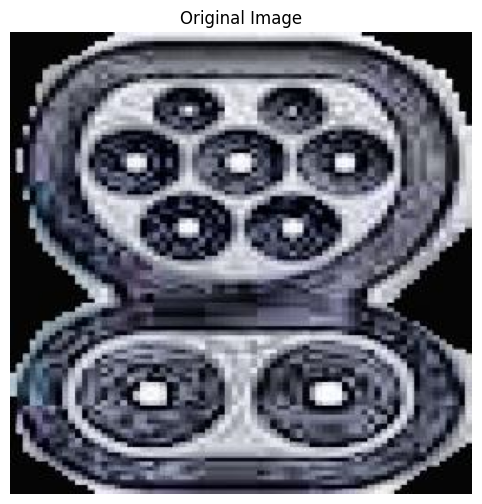

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


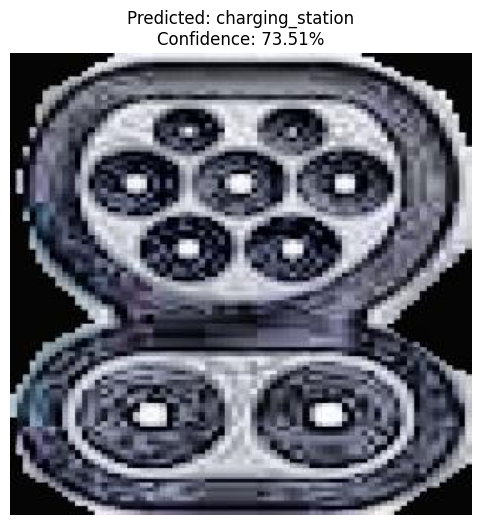


Prediction Details:
charging_station: 73.51%
charging_plug: 26.49%


In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load the trained model
model = tf.keras.models.load_model('ev_charger_classifier.keras')

# Define class names
class_names = ['charging_station', 'charging_plug']

def predict_image(image_path):
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display original image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()
    
    # Preprocess image
    img_resized = cv2.resize(img, (128, 128))
    img_normalized = img_resized.astype(np.float32) / 255.0
    img_batch = np.expand_dims(img_normalized, 0)
    
    # Make prediction
    predictions = model.predict(img_batch)
    
    # Get class index and confidence
    class_idx = np.argmax(predictions[0])
    class_name = class_names[class_idx]
    
    # Get confidences for both classes
    confidences = predictions[0] * 100
    
    # Display prediction
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f'Predicted: {class_name}\nConfidence: {confidences[class_idx]:.2f}%')
    plt.axis('off')
    plt.show()
    
    # Print detailed predictions
    print("\nPrediction Details:")
    for idx, (name, conf) in enumerate(zip(class_names, confidences)):
        print(f"{name}: {conf:.2f}%")

# Test the model
image_path = 'test/ccs2-1-_jpeg.rf.4d9aa05e0396a5a00ddc898235079a88.jpg'  # Replace with your image path
predict_image(image_path)